In [76]:
import networkx as nx

In [90]:
G = nx.Graph()

In [91]:
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('F')
G.add_node('G')
G.add_node('H')
G.add_node('J')
G.add_node('K')
G.add_node('I')
G.add_node('M')
G.add_node('N')

In [92]:
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('A', 'D')
G.add_edge('C', 'H')
G.add_edge('C', 'J')
G.add_edge('C', 'K')
G.add_edge('B', 'I')
G.add_edge('B', 'M')
G.add_edge('B', 'N')
G.add_edge('J', 'F')

In [93]:
edges = list(G.edges())

In [94]:
def neighbors_node(node='A'):
    return [i[1] for i in edges if i[0]==node] + [i[0] for i in edges if i[1]==node]

In [95]:
from collections import deque, defaultdict
def bfs_search(name):
    dist=defaultdict()
    search_queue = deque()
    search_queue += neighbors_node(name)
    searched = [name]
    while search_queue:

        person = search_queue.popleft()
        # person = search_queue.pop() - в этои случае пойдет поиск в глубину

        if person not in searched:

            search_queue += neighbors_node(person)

            searched.append(person)
            
    return searched

In [96]:
#bfs_search('A')

In [97]:
def dfs_search_reqursive(name='A'):
    global searched
    searched.append(name)
    neighbors = neighbors_node(name)
    for i in neighbors:
        #print(i)
        if i not in searched:
            dfs_search_reqursive(name=i)
    return

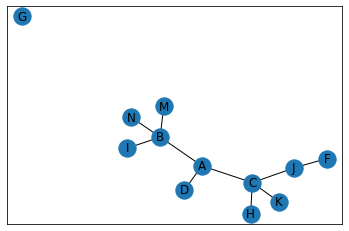

In [102]:
nx.draw_networkx(G)

In [98]:
searched = []
dfs_search_reqursive(name='N')

In [99]:
searched

['N', 'B', 'I', 'M', 'A', 'C', 'H', 'J', 'F', 'K', 'D']

In [100]:
def shortest_path_dijkstra(G, source):
    dist = {source: 0}
    queue = deque([source])
    while queue:
        node = queue.popleft()
        new_dist = dist[node] + 1
        neighbors = set(G[node]).difference(dist)
        for n in neighbors:
            dist[n] = new_dist
        queue.extend(neighbors)
    return dist

In [101]:
shortest_path_dijkstra(G, 'A')

{'A': 0,
 'D': 1,
 'C': 1,
 'B': 1,
 'K': 2,
 'J': 2,
 'H': 2,
 'N': 2,
 'I': 2,
 'M': 2,
 'F': 3}